In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os

# Adding parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src import colony

In [ ]:
filename = '../results/100SL/sample0/model.pkl'

with open(filename, 'rb') as handle:
    col = pickle.load(handle)

In [19]:
# Time steps used
dts = [1e1, 5e0, 1e0, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4]

t50list = []
t90list = []
t98list = []
# Loop through the saved files and plot the
for dt in dts:
    filename = '../results/tConvergence/dt' + str(dt) + '/model.pkl'
    with open(filename, 'rb') as handle:
        col = pickle.load(handle)
    print('dt = %.4f' %dt)
    # Now extract the time at which total concentration exceeds a certain value
    t50list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.5)])
    t90list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.9)])
    t98list.append(col.tList[np.argmax(np.array(col.concentrationList) > 0.98)])

dt = 10.0000
dt = 5.0000
dt = 1.0000
dt = 0.5000
dt = 0.1000
dt = 0.0500
dt = 0.0100
dt = 0.0050
dt = 0.0010
dt = 0.0005
dt = 0.0001


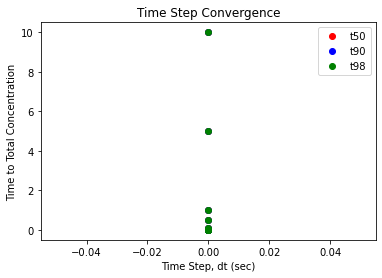

In [20]:
# Make plots of the t50, t90, t98 vs dt
plt.plot(t50list, dts, 'ro', label = 't50')
plt.plot(t90list, dts, 'bo', label = 't90')
plt.plot(t98list, dts, 'go', label = 't98')
plt.xlabel('Time Step, dt (sec)')
plt.ylabel('Time to Total Concentration')
plt.title('Time Step Convergence')
plt.legend()